In [9]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [10]:
# Load dataset
df = pd.read_csv("data.csv")

df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[70  1]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.9974


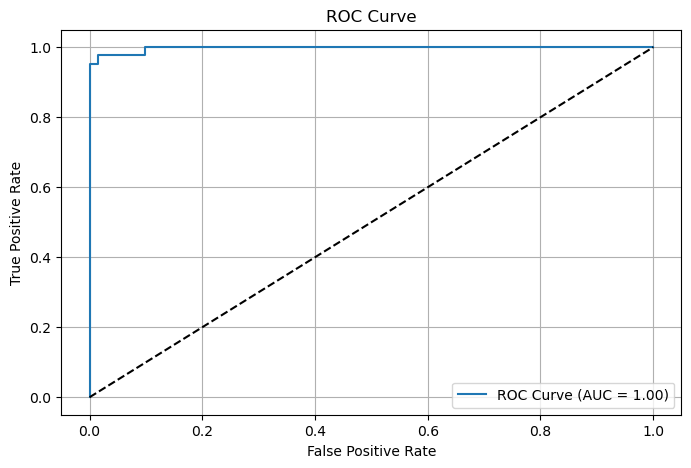

In [11]:

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Threshold tuning example
custom_threshold = 0.3
y_custom_pred = (y_proba >= custom_threshold).astype(int)

print(f"\nConfusion Matrix (Threshold = {custom_threshold}):")
print(confusion_matrix(y_test, y_custom_pred))
print("\nClassification Report (Threshold tuned):")
print(classification_report(y_test, y_custom_pred))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



Confusion Matrix (Threshold = 0.3):
[[67  4]
 [ 1 42]]

Classification Report (Threshold tuned):
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [3]:
z = np.linspace(-10, 10, 200)
plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()


NameError: name 'np' is not defined